In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.decomposition import PCA

In [2]:
# Data Loading
photos_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/photos.csv', sep=',', encoding='latin-1',low_memory=False)
ratings_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/ratings.csv', sep=',', encoding='latin-1',low_memory=False)
surveys_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/surveys.csv', sep=',', encoding='latin-1',low_memory=False)
annotations_df = pd.read_csv('C:/Users/lmir/Desktop/Tese/Results_sim/emorecsys_data/CSVs_8_7_2024/csvs_survey/annotations.csv', sep=',', encoding='latin-1',low_memory=False)

In [3]:
#Go fetch the train and test
testset = pd.read_csv('testset.csv')
trainset = pd.read_csv('trainset.csv')

# Converter de volta para lista de tuplas
testset = [tuple(row) for row in testset.to_numpy()]
trainset = [tuple(row) for row in trainset.to_numpy()]

# Exibir os dados carregados
print(testset)
print(trainset)

[(1, 1738, 1), (1, 318, 0), (1, 1055, 1), (2, 40, 1), (2, 1898, 0), (2, 544, 1), (3, 675, 1), (3, 235, 0), (3, 1295, 1), (4, 2901, 1), (4, 1250, 0), (4, 1082, 1), (5, 1717, 1), (5, 2717, 1), (5, 2897, 1), (6, 1251, 1), (6, 2143, 1), (6, 546, 1), (7, 429, 1), (7, 2877, 0), (7, 2195, 1), (8, 38, 1), (8, 2516, 0), (8, 1925, 0), (9, 1839, 1), (9, 2677, 0), (9, 1543, 1), (10, 2738, 1), (10, 3059, 0), (10, 2892, 1), (11, 1255, 1), (11, 2002, 0), (11, 1612, 0), (12, 1235, 1), (12, 2876, 0), (12, 2099, 1), (13, 2474, 1), (13, 2684, 0), (13, 155, 0), (14, 2533, 1), (14, 857, 0), (14, 2736, 0), (15, 1312, 1), (15, 2390, 0), (15, 407, 1), (16, 215, 1), (16, 1335, 0), (16, 205, 1), (17, 530, 1), (17, 3057, 0), (17, 791, 1), (18, 1737, 1), (18, 954, 0), (18, 1156, 1), (19, 980, 1), (19, 98, 1), (19, 3004, 1), (20, 1429, 1), (20, 1861, 0), (20, 567, 1), (21, 584, 1), (21, 853, 0), (21, 2792, 1), (22, 1428, 1), (22, 365, 0), (22, 724, 1), (23, 634, 1), (23, 534, 0), (23, 1315, 1), (24, 1683, 1), (24,

In [4]:
df_embeddings_vgg16 = pd.read_json('df_embeddings_vgg16.json', orient='records', lines=True)
df_embeddings_vgg19 = pd.read_json('df_embeddings_vgg19.json', orient='records', lines=True)
df_embeddings_resnet50 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet50v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet101 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet101v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_resnet152v2 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_inceptionv3 = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)
df_embeddings_xception = pd.read_json('df_embeddings_resnet152.json', orient='records', lines=True)

In [5]:
embeddings_list_vgg16 = df_embeddings_vgg16['embedding'].tolist()
embeddings_list_vgg19 = df_embeddings_vgg19['embedding'].tolist()
embeddings_list_restnet50 = df_embeddings_resnet50['embedding'].tolist()
embeddings_list_restnet50v2 = df_embeddings_resnet50v2['embedding'].tolist()
embeddings_list_restnet101 = df_embeddings_resnet101['embedding'].tolist()
embeddings_list_restnet101v2 = df_embeddings_resnet101v2['embedding'].tolist()
embeddings_list_restnet152 = df_embeddings_resnet152['embedding'].tolist()
embeddings_list_restnet152v2 = df_embeddings_resnet152v2['embedding'].tolist()
embeddings_list_inceptionv3 = df_embeddings_inceptionv3['embedding'].tolist()
embeddings_list_xception = df_embeddings_xception['embedding'].tolist()

# Crie um DataFrame onde cada vetor de embedding é uma lista em uma única coluna
df_embeddings_vgg16_1 = pd.DataFrame({'embedding': embeddings_list_vgg16})
df_embeddings_vgg19_1 = pd.DataFrame({'embedding': embeddings_list_vgg19})
df_embeddings_resnet50_1 = pd.DataFrame({'embedding': embeddings_list_restnet50})
df_embeddings_resnet50v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet50v2})
df_embeddings_resnet101_1 = pd.DataFrame({'embedding': embeddings_list_restnet101})
df_embeddings_resnet101v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet101v2})
df_embeddings_resnet152_1 = pd.DataFrame({'embedding': embeddings_list_restnet152})
df_embeddings_resnet152v2_1 = pd.DataFrame({'embedding': embeddings_list_restnet152v2})
df_embeddings_inceptionv3_1 = pd.DataFrame({'embedding': embeddings_list_inceptionv3})
df_embeddings_xception_1 = pd.DataFrame({'embedding': embeddings_list_xception})


df_embeddings_vgg16_1['id'] = df_embeddings_vgg16['id'].values
df_embeddings_vgg19_1['id'] = df_embeddings_vgg19['id'].values
df_embeddings_resnet50_1['id'] = df_embeddings_resnet50['id'].values
df_embeddings_resnet50v2_1['id'] = df_embeddings_resnet50v2['id'].values
df_embeddings_resnet101_1['id'] = df_embeddings_resnet101['id'].values
df_embeddings_resnet101v2_1['id'] = df_embeddings_resnet101v2['id'].values
df_embeddings_resnet152_1['id'] = df_embeddings_resnet152['id'].values
df_embeddings_resnet152v2_1['id'] = df_embeddings_resnet152v2['id'].values
df_embeddings_inceptionv3_1['id'] = df_embeddings_inceptionv3['id'].values
df_embeddings_xception_1['id'] = df_embeddings_xception['id'].values

# Verifique o resultado
print(df_embeddings_vgg16_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg16_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_vgg19_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_vgg19_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet50v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet50v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet101v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet101v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_resnet152v2_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_resnet152v2_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_inceptionv3_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_inceptionv3_1.head())  # Mostra as primeiras linhas do DataFrame
print(df_embeddings_xception_1.shape)  # Mostra a forma do DataFrame
print(df_embeddings_xception_1.head())  # Mostra as primeiras linhas do DataFrame

type(df_embeddings_resnet50_1['embedding'][0])
type(df_embeddings_resnet50v2_1['embedding'][0])
type(df_embeddings_resnet101_1['embedding'][0])
type(df_embeddings_resnet101v2_1['embedding'][0])
type(df_embeddings_resnet152_1['embedding'][0])
type(df_embeddings_resnet152v2_1['embedding'][0])
type(df_embeddings_inceptionv3_1['embedding'][0])
type(df_embeddings_xception_1['embedding'][0])

(2885, 2)
                                           embedding   id
0  [[0.0, 25.103931427, 34.5760383606, 0.0, 13.10...  492
1  [[0.0, 14.7611036301, 2.9091243744, 8.95020675...  496
2  [[82.2871780396, 26.518907547, 89.4835128784, ...    1
3  [[25.3831501007, 0.0, 87.2220230103, 0.0, 28.6...    2
4  [[0.3590965271, 14.3963012695, 78.7917785645, ...    3
(2885, 2)
                                           embedding   id
0  [[30.9996681213, 0.0, 13.3653011322, 0.0, 20.3...  492
1  [[30.7576274872, 24.7594871521, 0.0, 0.0, 58.7...  496
2  [[62.916015625, 17.9737758636, 49.7146720886, ...    1
3  [[45.7393226624, 0.0, 117.1519012451, 0.0, 13....    2
4  [[11.1067037582, 51.9066696167, 15.1681070328,...    3
(2885, 2)
                                           embedding   id
0  [[1.1370655298, 0.0, 3.5498535633, 1.936263799...  492
1  [[1.7643741369, 2.2429094315, 0.8603625298, 2....  496
2  [[8.951385498, 9.810792923, 2.2054009438, 3.36...    1
3  [[2.6090278625, 11.295633316, 7.1894006

list

In [6]:
def evaluate_metrics(recommendations, testset, ks):
    """
    Calculates precision, recall, and F1-score for different values of k, based on the recommendations and the test set.

    Args:
        recommendations (dict): A dictionary where keys are user IDs and values are lists of recommended item IDs.
        testset (Dataset): The test dataset containing user-item interactions with ratings.
        ks (list): A list of integer values for k, representing the number of top recommendations to evaluate.

    Returns:
        tuple: Three dictionaries (precisions, recalls, f1_scores) where each key is a value of k and the values are dictionaries mapping user IDs to their respective precision, recall, and F1-score for that k.
    """

    relevant_items_dict = {}
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])
    for user in test_df['uid'].unique():
        user_test_df = test_df[test_df['uid'] == user]
        relevant_items = set(user_test_df[user_test_df['rating'] > 0]['iid'])
        relevant_items_dict[user] = relevant_items

    precisions = {k: {} for k in ks}
    recalls = {k: {} for k in ks}
    f1_scores = {k: {} for k in ks}

    for user, relevant_items in relevant_items_dict.items():
        relevant_set = set(relevant_items)
        # print('relevant_set')
        # print(relevant_set)
        for k in ks:
            top_k_recommendations = set(recommendations[user][:k])
            relevant_and_recommended = top_k_recommendations & relevant_set #Interseption between the recommended and relevant
            # print('relevant_and_recommended')
            # print(relevant_and_recommended)
            rel_rec = len(relevant_and_recommended)
            precision = rel_rec / k if k > 0 else 0.0
            recall = rel_rec / len(relevant_set) if relevant_set else 0.0
            f1score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

            precisions[k][user] = precision
            recalls[k][user] = recall
            f1_scores[k][user] = f1score

    return precisions, recalls, f1_scores

def evaluate_metrics_avg(precisions, recalls, f1scores):
    """Calculates the average precision, recall, an f1-score for different values of k,
    based on the precision, recall, and f1-score metrics calculated for each user

    Args:
        precisions (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their precision score
        recalls (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their recall score
        f1scores (dict): keys are the values of k and the values are dicts where the keys are the user ids
        and their f1-score score

    Returns:
        tuple: containing three dicts:
        
        -avg_precisions: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average precision scores
        -avg_recalls: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average recall scores
        -avg_f1-scores: average precision score for the values of k, the keys are the values of k
        and the values are the corresponding average f1-scores
    """

    avg_precisions = {k: round(sum(precisions[k].values()) / len(precisions[k]), 4) for k in precisions}
    avg_recalls = {k: round(sum(recalls[k].values()) / len(recalls[k]), 4) for k in recalls}
    avg_f1scores = {k: round(sum(f1scores[k].values()) / len(f1scores[k]), 4) for k in f1scores}

    # print(avg_precisions)
    return avg_precisions, avg_recalls, avg_f1scores

In [7]:
def similar_items(item_to_recommend, user_profile_items, similarity_matrix_df, n=2):
    train_items_scores = similarity_matrix_df.loc[item_to_recommend, similarity_matrix_df.columns.isin(user_profile_items)]

    tuples_ids_score = list(zip(train_items_scores.index, train_items_scores.values))
    tuples_ids_score.sort(key=lambda x: x[1], reverse=True)
    item_ids = [item for item, _ in tuples_ids_score]
    # return item_ids[:n]
    return tuples_ids_score[:n] ,item_ids[:n]

In [8]:
def compute_cosine_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)
    similarity_matrix = cosine_similarity(pixels_vec)
    # print(pixels_vec)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

        
    return similarity_df

def compute_euclidean_similarity_matrix_by_user(df_embeddings):

    pixels_vec = np.array(df_embeddings['embedding'].tolist())

    # print(pixels_vec.shape)
    pixels_vec = np.squeeze(pixels_vec)
    # print(pixels_vec.shape)

    pixels_vec_normalized = normalize(pixels_vec, norm='l2')

    similarity_matrix = euclidean_distances(pixels_vec_normalized)

    similarity_df = pd.DataFrame(similarity_matrix, index=df_embeddings['id'], columns=df_embeddings['id'])

    if similarity_df.columns.is_unique == False:
        print('PROBLEM COLUMNS')

    if similarity_df.index.is_unique == False:
        print('PROBLEM INDEXS')

    assert similarity_df.columns.is_unique, f"Duplicated columns in similarity_df: {similarity_df.columns[similarity_df.columns.duplicated()]}"
    assert similarity_df.index.is_unique, f"Duplicated indices in similarity_df: {similarity_df.index[similarity_df.index.duplicated()]}"

    return similarity_df

In [9]:
def recommend_items_by_user_cos(trainset, testset, df_embeddings, n):

    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_cosine_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():
        #print("user " , user)

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        available_items = list(items_all_ids - set(train_item_ids)- set(test_item_ids))
        random_items = random.sample(available_items, 20)

        # Metric 1 - médria dos ratings
        # for item in available_items:
        #     item_sim_tuple, item_train_id  = similar_items(item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings) #if ratings else 0
        #     items_to_recommend.append((item, mean_value_ratings))

        
        # Metric 2
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score * rating)
        #         sum_sim = sum_sim + sim_score
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item, item_value))

        # Metric 2 - testset
        for item in random_items:
            item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item, item_value))

        for item_test in test_item_ids:
            item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item_test, item_value))    


        # Metric 3
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user += sum_user + ((sim_score**2) * rating)
        #         sum_sim += sum_sim + (sim_score ** 2)
        #     item_value = (sum_user / sum_sim) 
        #     items_to_recommend.append((item, item_value))

        items_to_recommend.sort(key=lambda x: x[1], reverse=True)
       #print(items_to_recommend)
        items_to_recommend_ids = [item for item, _ in items_to_recommend]

        recommendations[user] = items_to_recommend_ids[:10]
        # break

    return recommendations

def recommend_items_by_user_eucl(trainset, testset, df_embeddings, n=2):
    train_df = pd.DataFrame(trainset, columns=['uid', 'iid', 'rating'])
    test_df = pd.DataFrame(testset, columns=['uid', 'iid', 'rating'])

    items_all_ids = set(train_df['iid'].to_list() + test_df['iid'].to_list())

    similarity_df = compute_euclidean_similarity_matrix_by_user(df_embeddings)

    recommendations = {}

    for user in test_df['uid'].unique():

        user_train = train_df[train_df['uid'] == user]
        user_test = test_df[test_df['uid'] == user]

        train_item_ids = user_train['iid'].to_list()
        test_item_ids = user_test['iid'].to_list()

        items_to_recommend = []

        available_items = list(items_all_ids - set(train_item_ids) - set(test_item_ids)) # todos os items menos os do 
        random_items = random.sample(available_items, 20)

        # Metric 1 - médria dos ratings
        # for item in available_items:
        #     item_sim_tuple, item_train_id  = similar_items(item, train_item_ids, similarity_df, n)
        #     item_sim_df = user_train[user_train['iid'].isin(item_train_id)]
        #     ratings = item_sim_df['rating'].tolist()
        #     mean_value_ratings = np.mean(ratings) #if ratings else 0
        #     items_to_recommend.append((item, mean_value_ratings))

        
        # Metric 2
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         # print(iid)
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user = sum_user + (sim_score * rating)
        #         sum_sim = sum_sim + sim_score
        #     item_value = sum_user/sum_sim
        #     items_to_recommend.append((item, item_value))

        for item in random_items:
            item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item, item_value))

        for item_test in test_item_ids:
            item_random_sim , item_random_sim_id = similar_items(item_test, train_item_ids, similarity_df, n)
            item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
            sum_user = 0
            sum_sim = 0
            for iid , sim_score in item_random_sim:
                # print(iid)
                rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
                sum_user = sum_user + (sim_score * rating)
                sum_sim = sum_sim + sim_score
            item_value = sum_user#/sum_sim
            items_to_recommend.append((item_test, item_value))    

        # Metric 3
        # for item in available_items:
        #     item_random_sim , item_random_sim_id = similar_items(item, train_item_ids, similarity_df, n)
        #     item_random_sim_df = user_train[user_train['iid'].isin(item_random_sim_id)]
        #     sum_user = 0
        #     sum_sim = 0
        #     for iid , sim_score in item_random_sim:
        #         rating = item_random_sim_df.loc[item_random_sim_df['iid'] == iid, 'rating'].values[0]
        #         sum_user += sum_user + ((sim_score**2) * rating)
        #         sum_sim += sum_sim + (sim_score ** 2)
        #     item_value = (sum_user / sum_sim) 
        #     items_to_recommend.append((item, item_value))

        items_to_recommend.sort(key=lambda x: x[1], reverse=True)
        # print(items_to_recommend)
        items_to_recommend_ids = [item for item, _ in items_to_recommend]
        # print(items_to_recommend_ids[:10])
        recommendations[user] = items_to_recommend_ids[:10]
        # break

    return recommendations

In [10]:
embedding_matrix_vgg16 = np.vstack(df_embeddings_vgg16_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_vgg19 = np.vstack(df_embeddings_vgg19_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50 = np.vstack(df_embeddings_resnet50_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet50v2 = np.vstack(df_embeddings_resnet50v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101 = np.vstack(df_embeddings_resnet101_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet101v2 = np.vstack(df_embeddings_resnet101v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152 = np.vstack(df_embeddings_resnet152_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_resnet152v2 = np.vstack(df_embeddings_resnet152v2_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_inceptionv3 = np.vstack(df_embeddings_inceptionv3_1['embedding'].apply(lambda x: np.array(x).flatten()))
embedding_matrix_xception = np.vstack(df_embeddings_xception_1['embedding'].apply(lambda x: np.array(x).flatten()))

## PCA vgg16

Number of components explaining 95% variance: 274


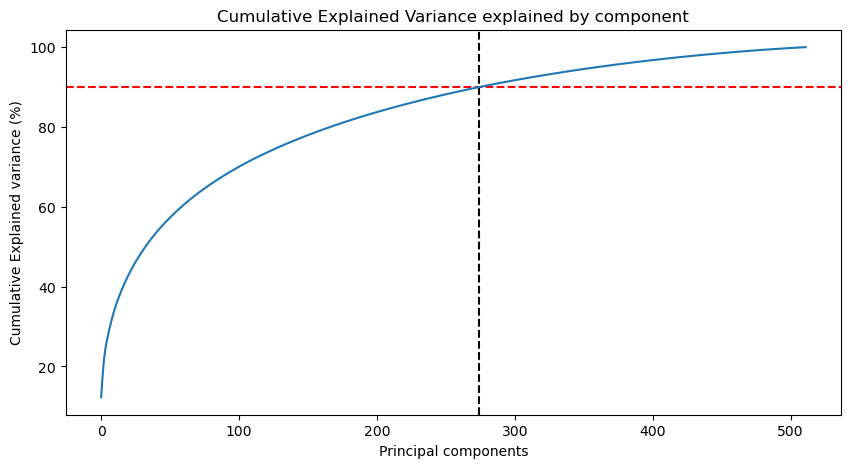

In [11]:
pca = PCA()
pca.fit(embedding_matrix_vgg16)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg16 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg16))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg16, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [12]:
pca_vgg16 = PCA(n_components=274)
embedding_matrix_pcavgg16 = pca_vgg16.fit_transform(embedding_matrix_vgg16)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg16_pca = pd.DataFrame({
    'id': df_embeddings_vgg16_1['id'],
    'embedding': embedding_matrix_pcavgg16.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg16_pca.head())

    id                                          embedding
0  492  [-210.01505607238806, 40.05785971536679, -75.9...
1  496  [-232.90309610491767, 112.97455225345185, -104...
2    1  [273.268881198321, 201.86798150752423, -233.17...
3    2  [62.210446115951484, 176.1267360835502, -78.06...
4    3  [24.507685798797986, 102.84983811125329, -134....


[0.0736, 0.092, 0.1043, 0.0859, 0.0736, 0.0798, 0.0736, 0.0798, 0.0736, 0.0859, 0.0859, 0.0798]


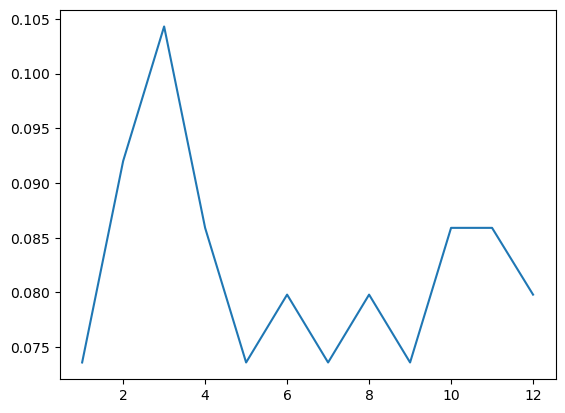

In [13]:
precision_top1_cos_vgg16 = []
for n in range(1, 13):
    rec_cos_vgg16_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_vgg16.append(avg_precisions.get(1))

print(precision_top1_cos_vgg16)
plt.plot(range(1,13), precision_top1_cos_vgg16)
plt.show()

In [14]:
rec_cos_vgg16_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg16_pca, n=3)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0736  Average Recall: 0.0389  Average F1-score: 0.0501
k=2:  Average Precision: 0.0798  Average Recall: 0.0859  Average F1-score: 0.0810
k=3:  Average Precision: 0.0736  Average Recall: 0.1176  Average F1-score: 0.0888
k=4:  Average Precision: 0.0752  Average Recall: 0.1595  Average F1-score: 0.1005
k=5:  Average Precision: 0.0810  Average Recall: 0.2117  Average F1-score: 0.1155
k=6:  Average Precision: 0.0787  Average Recall: 0.2485  Average F1-score: 0.1178
k=7:  Average Precision: 0.0762  Average Recall: 0.2781  Average F1-score: 0.1182
k=8:  Average Precision: 0.0752  Average Recall: 0.3190  Average F1-score: 0.1201
k=9:  Average Precision: 0.0763  Average Recall: 0.3630  Average F1-score: 0.1247
k=10:  Average Precision: 0.0742  Average Recall: 0.3988  Average F1-score: 0.1237


[0.0245, 0.0798, 0.0613, 0.0675, 0.092, 0.1043, 0.0982, 0.1104, 0.0798, 0.092, 0.092, 0.0859]


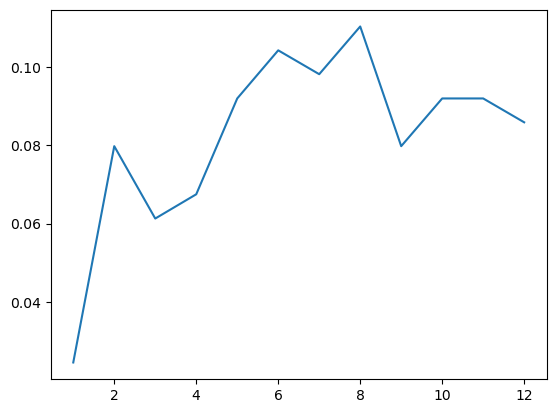

In [15]:
precision_top1_eucl_vgg16 = []
for n in range(1, 13):
    rec_eucl_vgg16_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_vgg16.append(avg_precisions.get(1))

print(precision_top1_eucl_vgg16)
plt.plot(range(1,13), precision_top1_eucl_vgg16)
plt.show()

In [16]:
rec_eucl_vgg16_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_vgg16_pca, n=4)

ks=range(1,11)
precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg16_pca, testset, ks=ks)
avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
for k in ks:
    print(f"k={k}:  Average Precision: {avg_precisions[k]:.4f}  Average Recall: {avg_recalls[k]:.4f}  Average F1-score: {avg_f1scores[k]:.4f}")

k=1:  Average Precision: 0.0736  Average Recall: 0.0429  Average F1-score: 0.0532
k=2:  Average Precision: 0.0706  Average Recall: 0.0767  Average F1-score: 0.0718
k=3:  Average Precision: 0.0818  Average Recall: 0.1319  Average F1-score: 0.0988
k=4:  Average Precision: 0.0798  Average Recall: 0.1718  Average F1-score: 0.1070
k=5:  Average Precision: 0.0834  Average Recall: 0.2260  Average F1-score: 0.1200
k=6:  Average Precision: 0.0798  Average Recall: 0.2597  Average F1-score: 0.1204
k=7:  Average Precision: 0.0806  Average Recall: 0.3078  Average F1-score: 0.1262
k=8:  Average Precision: 0.0821  Average Recall: 0.3569  Average F1-score: 0.1318
k=9:  Average Precision: 0.0825  Average Recall: 0.3967  Average F1-score: 0.1351
k=10:  Average Precision: 0.0804  Average Recall: 0.4315  Average F1-score: 0.1341


## PCA vgg19

Number of components explaining 95% variance: 273


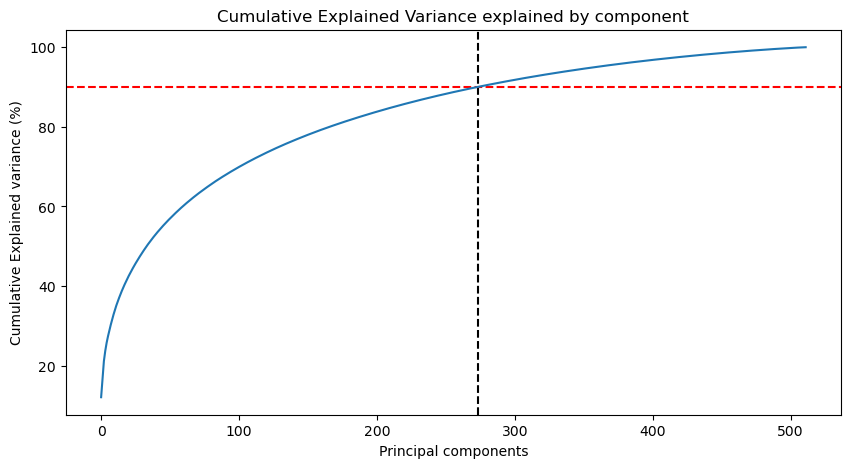

In [17]:
pca = PCA()
pca.fit(embedding_matrix_vgg19)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_vgg19 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_vgg19))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_vgg19, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [18]:
pca_vgg19 = PCA(n_components=pcs_90_vgg19)
embedding_matrix_pca_vgg19 = pca_vgg19.fit_transform(embedding_matrix_vgg19)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_vgg19_pca = pd.DataFrame({
    'id': df_embeddings_vgg19_1['id'],
    'embedding': embedding_matrix_pca_vgg19.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_vgg19_pca.head())

    id                                          embedding
0  492  [-255.86372934995825, 59.898560350044676, -42....
1  496  [-214.1405096235734, 94.98221533374013, -39.23...
2    1  [190.8358616757842, 241.7094171042132, -164.51...
3    2  [53.25222083686575, 173.44059504559678, -52.87...
4    3  [-1.229266653016702, 114.60216091774097, -44.5...


[0.0736, 0.092, 0.1288, 0.0859, 0.0736, 0.092, 0.0552, 0.0798, 0.092, 0.0798, 0.0982, 0.0675]


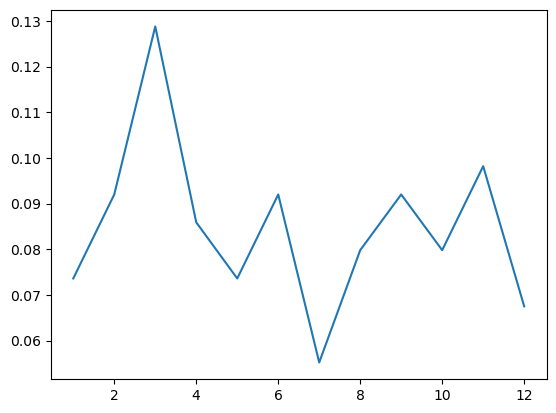

In [19]:
precision_top1_cos_vgg19 = []
for n in range(1, 13):
    rec_cos_vgg19_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_vgg19_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_vgg19.append(avg_precisions.get(1))

print(precision_top1_cos_vgg19)
plt.plot(range(1,13), precision_top1_cos_vgg19)
plt.show()

[0.0982, 0.092, 0.1411, 0.0798, 0.0798, 0.0859, 0.0798, 0.0859, 0.0859, 0.1043, 0.0859, 0.0613]


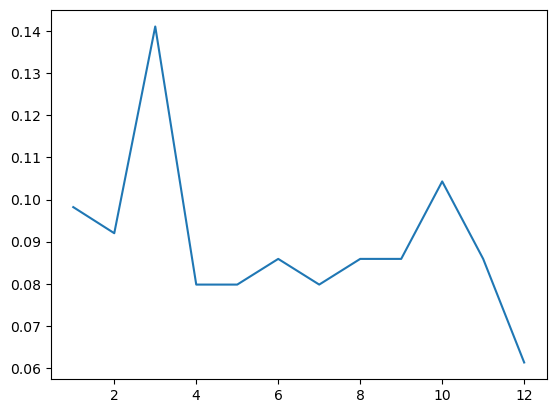

In [20]:
precision_top1_eucl_vgg19 = []
for n in range(1, 13):
    rec_eucl_vgg19_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_vgg19_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_vgg19_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_vgg19.append(avg_precisions.get(1))

print(precision_top1_eucl_vgg19)
plt.plot(range(1,13), precision_top1_eucl_vgg19)
plt.show()

## PCA ResNet50

Number of components explaining 95% variance: 616


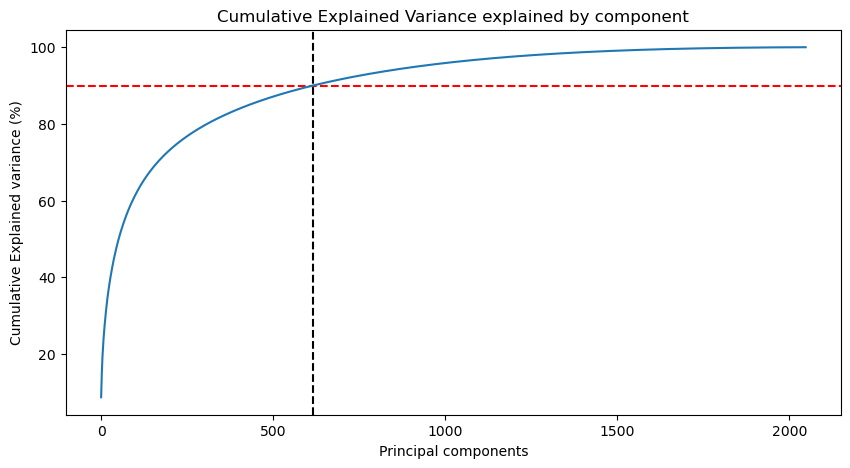

In [21]:
pca = PCA()
pca.fit(embedding_matrix_resnet50)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet50 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet50))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet50, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [22]:
pca_resnet50 = PCA(n_components=pcs_90_resnet50)
embedding_matrix_pca_resnet50 = pca_resnet50.fit_transform(embedding_matrix_resnet50)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet50_pca = pd.DataFrame({
    'id': df_embeddings_resnet50_1['id'],
    'embedding': embedding_matrix_pca_resnet50.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet50_pca.head())

    id                                          embedding
0  492  [-89.22814832584525, -4.818421287989996, 22.17...
1  496  [-92.58056785608568, 4.827474157733209, 70.967...
2    1  [-34.82031035349726, -12.783879575293232, -18....
3    2  [-9.020730185213612, -10.79870143306078, 15.23...
4    3  [-70.21395084136894, -55.37980626375076, -27.9...


[0.0613, 0.092, 0.092, 0.0859, 0.0613, 0.0982, 0.1043, 0.0859, 0.0859, 0.0798, 0.0859, 0.0613]


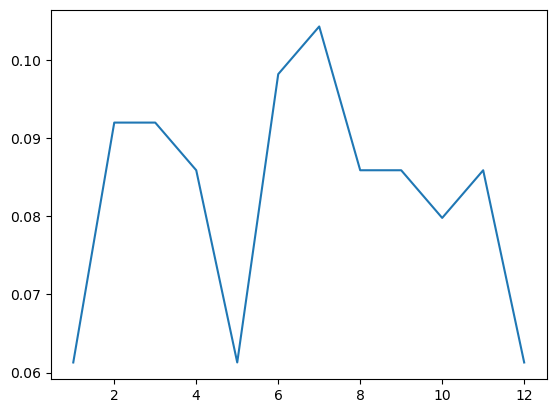

In [23]:
precision_top1_cos_resnet50 = []
for n in range(1, 13):
    rec_cos_resnet50_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet50_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet50_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet50.append(avg_precisions.get(1))

print(precision_top1_cos_resnet50)
plt.plot(range(1,13), precision_top1_cos_resnet50)
plt.show()

[0.0798, 0.0798, 0.0613, 0.0552, 0.092, 0.0552, 0.0675, 0.0859, 0.0368, 0.0675, 0.0491, 0.0613]


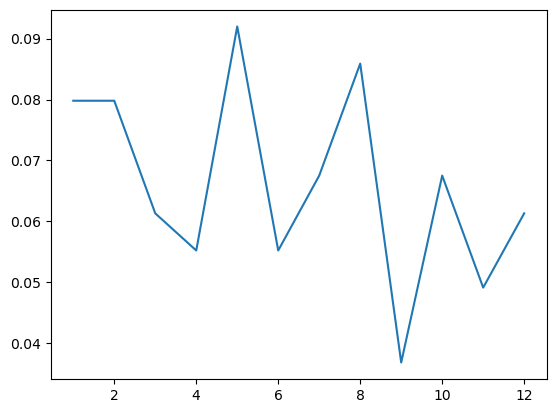

In [24]:
precision_top1_eucl_resnet50 = []
for n in range(1, 13):
    rec_eucl_resnet50_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet50_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet50_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet50.append(avg_precisions.get(1))

print(precision_top1_eucl_resnet50)
plt.plot(range(1,13), precision_top1_eucl_resnet50)
plt.show()

## PCA ResNet101

Number of components explaining 95% variance: 616


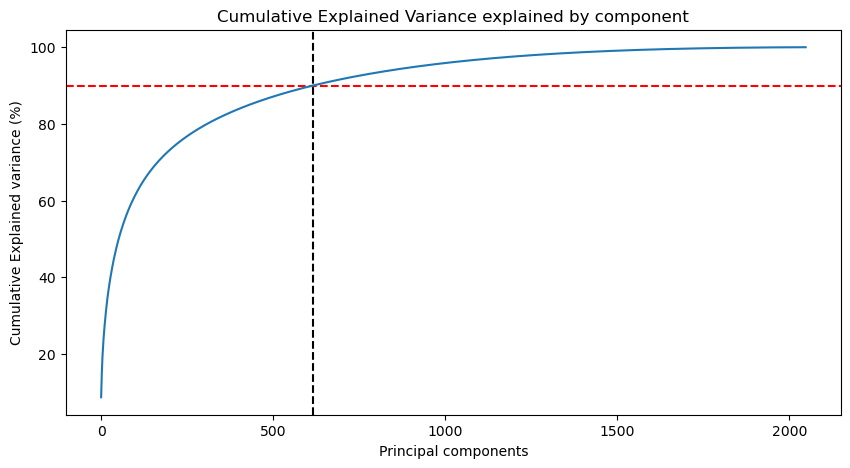

In [25]:
pca = PCA()
pca.fit(embedding_matrix_resnet101)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet101 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet101))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet101, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [26]:
pca_resnet101 = PCA(n_components=pcs_90_resnet101)
embedding_matrix_pca_resnet101 = pca_resnet101.fit_transform(embedding_matrix_resnet101)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet101_pca = pd.DataFrame({
    'id': df_embeddings_resnet101_1['id'],
    'embedding': embedding_matrix_pca_resnet101.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet101_pca.head())

    id                                          embedding
0  492  [-89.22814832559808, -4.818421275178875, 22.17...
1  496  [-92.58056785612553, 4.827474153061885, 70.967...
2    1  [-34.820310353758025, -12.783879578721569, -18...
3    2  [-9.020730185092932, -10.79870143065692, 15.23...
4    3  [-70.21395084136061, -55.37980626142099, -27.9...


[0.0798, 0.0859, 0.0798, 0.0613, 0.0552, 0.0736, 0.092, 0.1227, 0.0798, 0.0859, 0.0675, 0.0798]


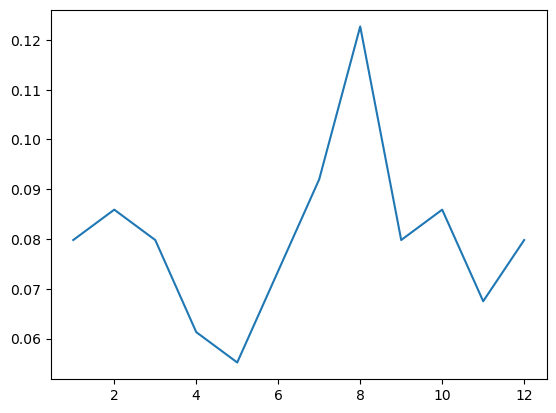

In [27]:
precision_top1_cos_resnet101 = []
for n in range(1, 13):
    rec_cos_resnet101_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet101_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet101_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet101.append(avg_precisions.get(1))

print(precision_top1_cos_resnet101)
plt.plot(range(1,13), precision_top1_cos_resnet101)
plt.show()

[0.0859, 0.0859, 0.0613, 0.092, 0.0859, 0.0675, 0.0736, 0.0736, 0.0307, 0.0552, 0.0736, 0.0736]


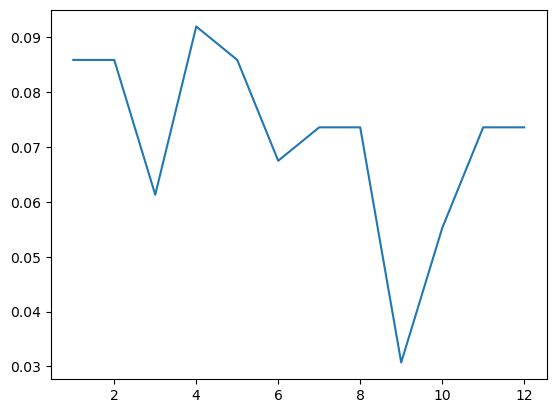

In [28]:
precision_top1_eucl_resnet101 = []
for n in range(1, 13):
    rec_eucl_resnet101_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet101_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet101_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet101.append(avg_precisions.get(1))

print(precision_top1_eucl_resnet101)
plt.plot(range(1,13), precision_top1_eucl_resnet101)
plt.show()

## PCA ResNet152

Number of components explaining 95% variance: 616


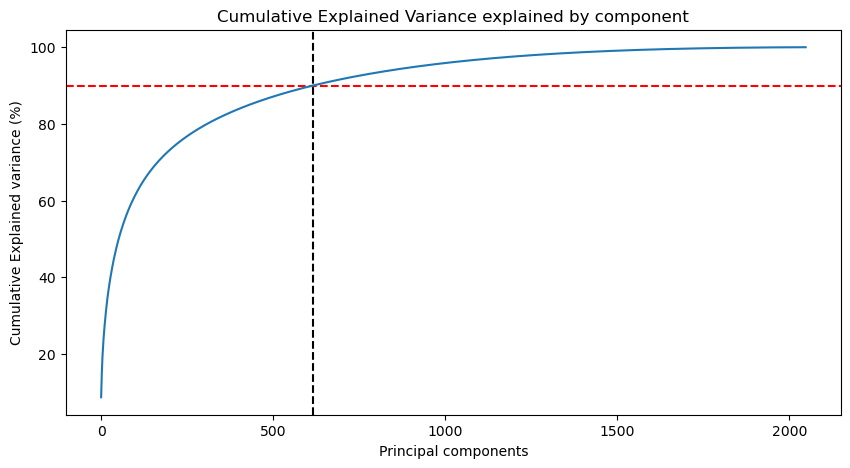

In [29]:
pca = PCA()
pca.fit(embedding_matrix_resnet152)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_resnet152 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_resnet152))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_resnet152, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [30]:
pca_resnet152 = PCA(n_components=pcs_90_resnet152)
embedding_matrix_pca_resnet152 = pca_resnet152.fit_transform(embedding_matrix_resnet152)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_resnet152_pca = pd.DataFrame({
    'id': df_embeddings_resnet152_1['id'],
    'embedding': embedding_matrix_pca_resnet152.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_resnet152_pca.head())

    id                                          embedding
0  492  [-89.22814832581001, -4.818421282047128, 22.17...
1  496  [-92.580567856267, 4.827474150018981, 70.96753...
2    1  [-34.82031035353671, -12.783879564704103, -18....
3    2  [-9.020730184939241, -10.798701447078027, 15.2...
4    3  [-70.21395084140208, -55.37980626447099, -27.9...


[0.0675, 0.1043, 0.0736, 0.1411, 0.0613, 0.0859, 0.1227, 0.1043, 0.0982, 0.0798, 0.0798, 0.0859]


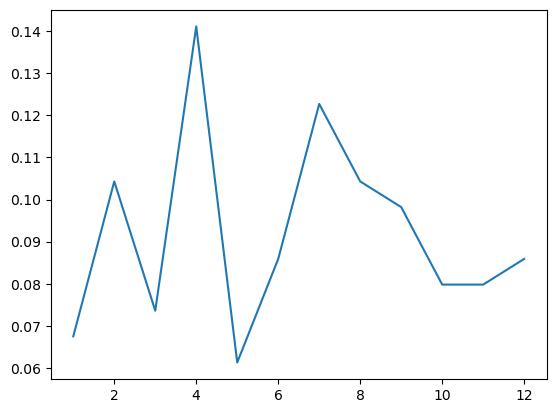

In [31]:
precision_top1_cos_resnet152 = []
for n in range(1, 13):
    rec_cos_resnet152_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_resnet152_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_resnet152_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_resnet152.append(avg_precisions.get(1))

print(precision_top1_cos_resnet152)
plt.plot(range(1,13), precision_top1_cos_resnet152)
plt.show()

[0.1104, 0.1043, 0.0552, 0.0859, 0.0675, 0.0675, 0.092, 0.0675, 0.0491, 0.0613, 0.0675, 0.0736]


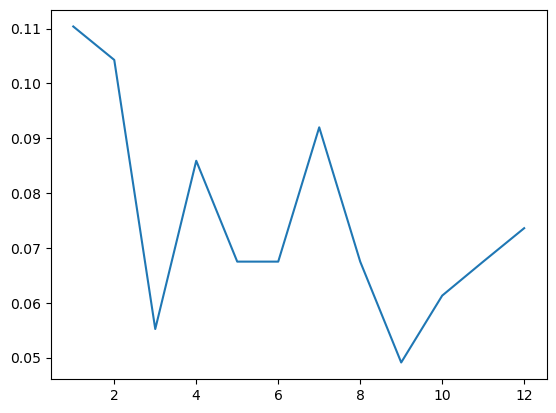

In [32]:
precision_top1_eucl_resnet152 = []
for n in range(1, 13):
    rec_eucl_resnet152_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_resnet152_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_resnet152_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_resnet152.append(avg_precisions.get(1))

print(precision_top1_eucl_resnet152)
plt.plot(range(1,13), precision_top1_eucl_resnet152)
plt.show()

## PCA InceptionV3

Number of components explaining 95% variance: 616


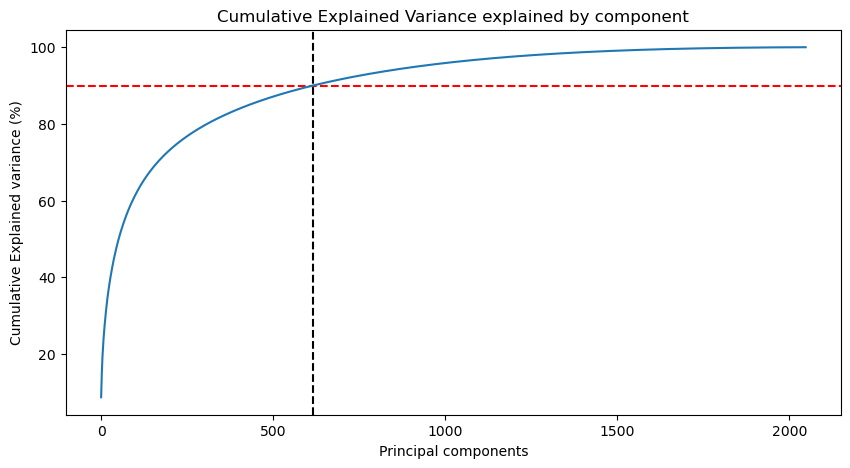

In [33]:
pca = PCA()
pca.fit(embedding_matrix_inceptionv3)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_inceptionv3 = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_inceptionv3))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_inceptionv3, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [34]:
pca_inceptionv3 = PCA(n_components=pcs_90_inceptionv3)
embedding_matrix_pca_inceptionv3 = pca_inceptionv3.fit_transform(embedding_matrix_inceptionv3)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_inceptionv3_pca = pd.DataFrame({
    'id': df_embeddings_inceptionv3_1['id'],
    'embedding': embedding_matrix_pca_inceptionv3.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_inceptionv3_pca.head())

    id                                          embedding
0  492  [-89.22814832562528, -4.8184212833724525, 22.1...
1  496  [-92.58056785614873, 4.827474151499693, 70.967...
2    1  [-34.82031035327082, -12.783879566499454, -18....
3    2  [-9.020730185325093, -10.798701446599322, 15.2...
4    3  [-70.21395084128714, -55.37980626157443, -27.9...


[0.092, 0.092, 0.1043, 0.0982, 0.0675, 0.0798, 0.135, 0.0982, 0.0798, 0.1043, 0.0798, 0.1104]


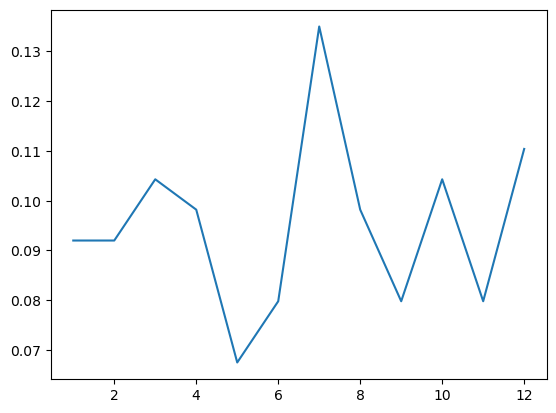

In [35]:
precision_top1_cos_inceptionv3 = []
for n in range(1, 13):
    rec_cos_inceptionv3_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_inceptionv3_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_inceptionv3_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_inceptionv3.append(avg_precisions.get(1))

print(precision_top1_cos_inceptionv3)
plt.plot(range(1,13), precision_top1_cos_inceptionv3)
plt.show()

[0.0798, 0.0798, 0.092, 0.0982, 0.0675, 0.0491, 0.0859, 0.0736, 0.0675, 0.0736, 0.1043, 0.0552]


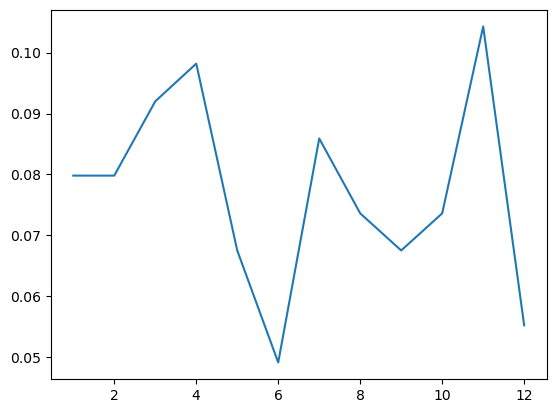

In [36]:
precision_top1_eucl_inceptionv3 = []
for n in range(1, 13):
    rec_eucl_inceptionv3_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_inceptionv3_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_inceptionv3_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_inceptionv3.append(avg_precisions.get(1))

print(precision_top1_eucl_inceptionv3)
plt.plot(range(1,13), precision_top1_eucl_inceptionv3)
plt.show()

## PCA Xcpetion

Number of components explaining 95% variance: 616


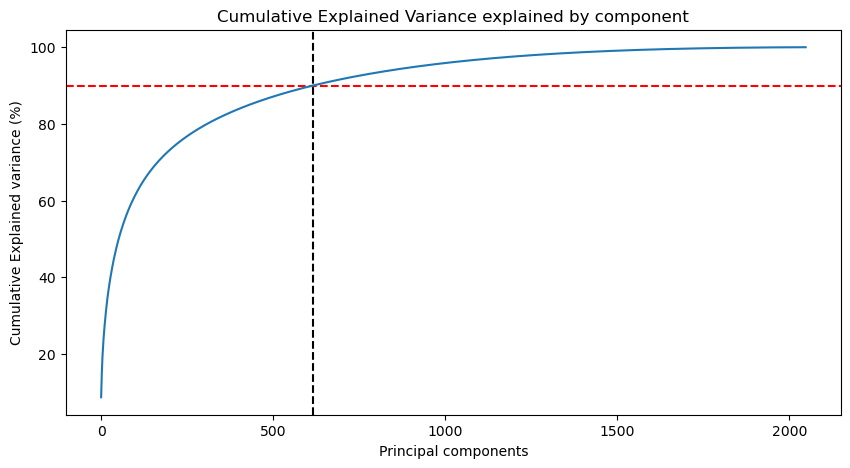

In [37]:
pca = PCA()
pca.fit(embedding_matrix_xception)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
pcs_90_xception = np.argmax(var_cumu>90)
print("Number of components explaining 95% variance: "+ str(pcs_90_xception))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=pcs_90_xception, color="k", linestyle="--")
plt.axhline(y=90, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [38]:
pca_xception = PCA(n_components=pcs_90_xception)
embedding_matrix_pca_xception = pca_xception.fit_transform(embedding_matrix_xception)

# Cria um novo DataFrame com os IDs e os embeddings reduzidos
df_embeddings_xception_pca = pd.DataFrame({
    'id': df_embeddings_xception_1['id'],
    'embedding': embedding_matrix_pca_xception.tolist()  # Adiciona os embeddings reduzidos como listas (vetores)
})

# Ver o novo DataFrame
print(df_embeddings_xception_pca.head())

    id                                          embedding
0  492  [-89.22814832564976, -4.818421282384782, 22.17...
1  496  [-92.58056785619578, 4.827474149553024, 70.967...
2    1  [-34.82031035366269, -12.783879566181112, -18....
3    2  [-9.020730185160177, -10.798701440067521, 15.2...
4    3  [-70.21395084122692, -55.37980625642391, -27.9...


[0.0798, 0.1043, 0.0798, 0.0859, 0.0736, 0.0798, 0.0798, 0.1166, 0.092, 0.0798, 0.0736, 0.0982]


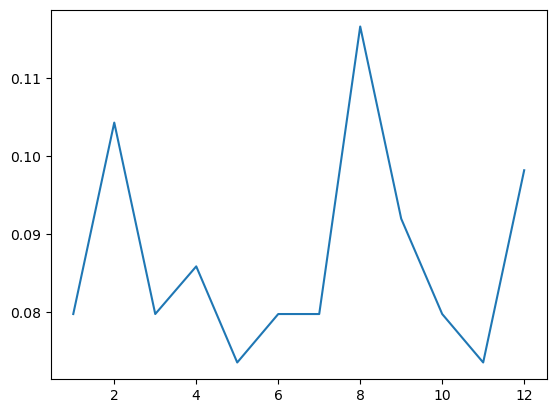

In [39]:
precision_top1_cos_xception = []
for n in range(1, 13):
    rec_cos_xception_pca = recommend_items_by_user_cos(trainset, testset, df_embeddings_xception_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_cos_xception_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_cos_xception.append(avg_precisions.get(1))

print(precision_top1_cos_xception)
plt.plot(range(1,13), precision_top1_cos_xception)
plt.show()

[0.0798, 0.0613, 0.0552, 0.0859, 0.0736, 0.0675, 0.0491, 0.0798, 0.0613, 0.0798, 0.0491, 0.0613]


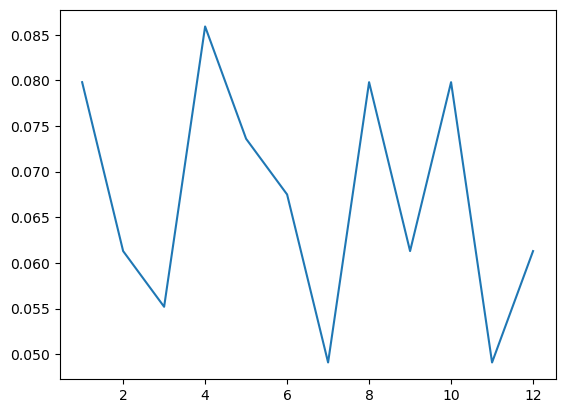

In [40]:
precision_top1_eucl_xception = []
for n in range(1, 13):
    rec_eucl_xception_pca = recommend_items_by_user_eucl(trainset, testset, df_embeddings_xception_pca, n)
    ks = [1]
    precisions, recalls, f1_scores = evaluate_metrics(rec_eucl_xception_pca, testset, ks=ks)
    avg_precisions, avg_recalls, avg_f1scores = evaluate_metrics_avg(precisions, recalls, f1_scores)
    precision_top1_eucl_xception.append(avg_precisions.get(1))

print(precision_top1_eucl_xception)
plt.plot(range(1,13), precision_top1_eucl_xception)
plt.show()

## Clusters